In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/propOverlap_decimal.csv')
df

genomicFeature,treatment,propOverlap,propOverlap_sum,proportion_overlap
<chr>,<chr>,<int>,<int>,<dbl>
TE,CC,16875,132243,0.12760600
exons,CC,57957,132243,0.43826138
introns,CC,29638,132243,0.22411772
putativePromoter,CC,3529,132243,0.02668572
UTRs,CC,4165,132243,0.03149505
intergenic,CC,20079,132243,0.15183412
TE,CH,6346,54342,0.11677892
exons,CH,26233,54342,0.48273895
introns,CH,12045,54342,0.22165176


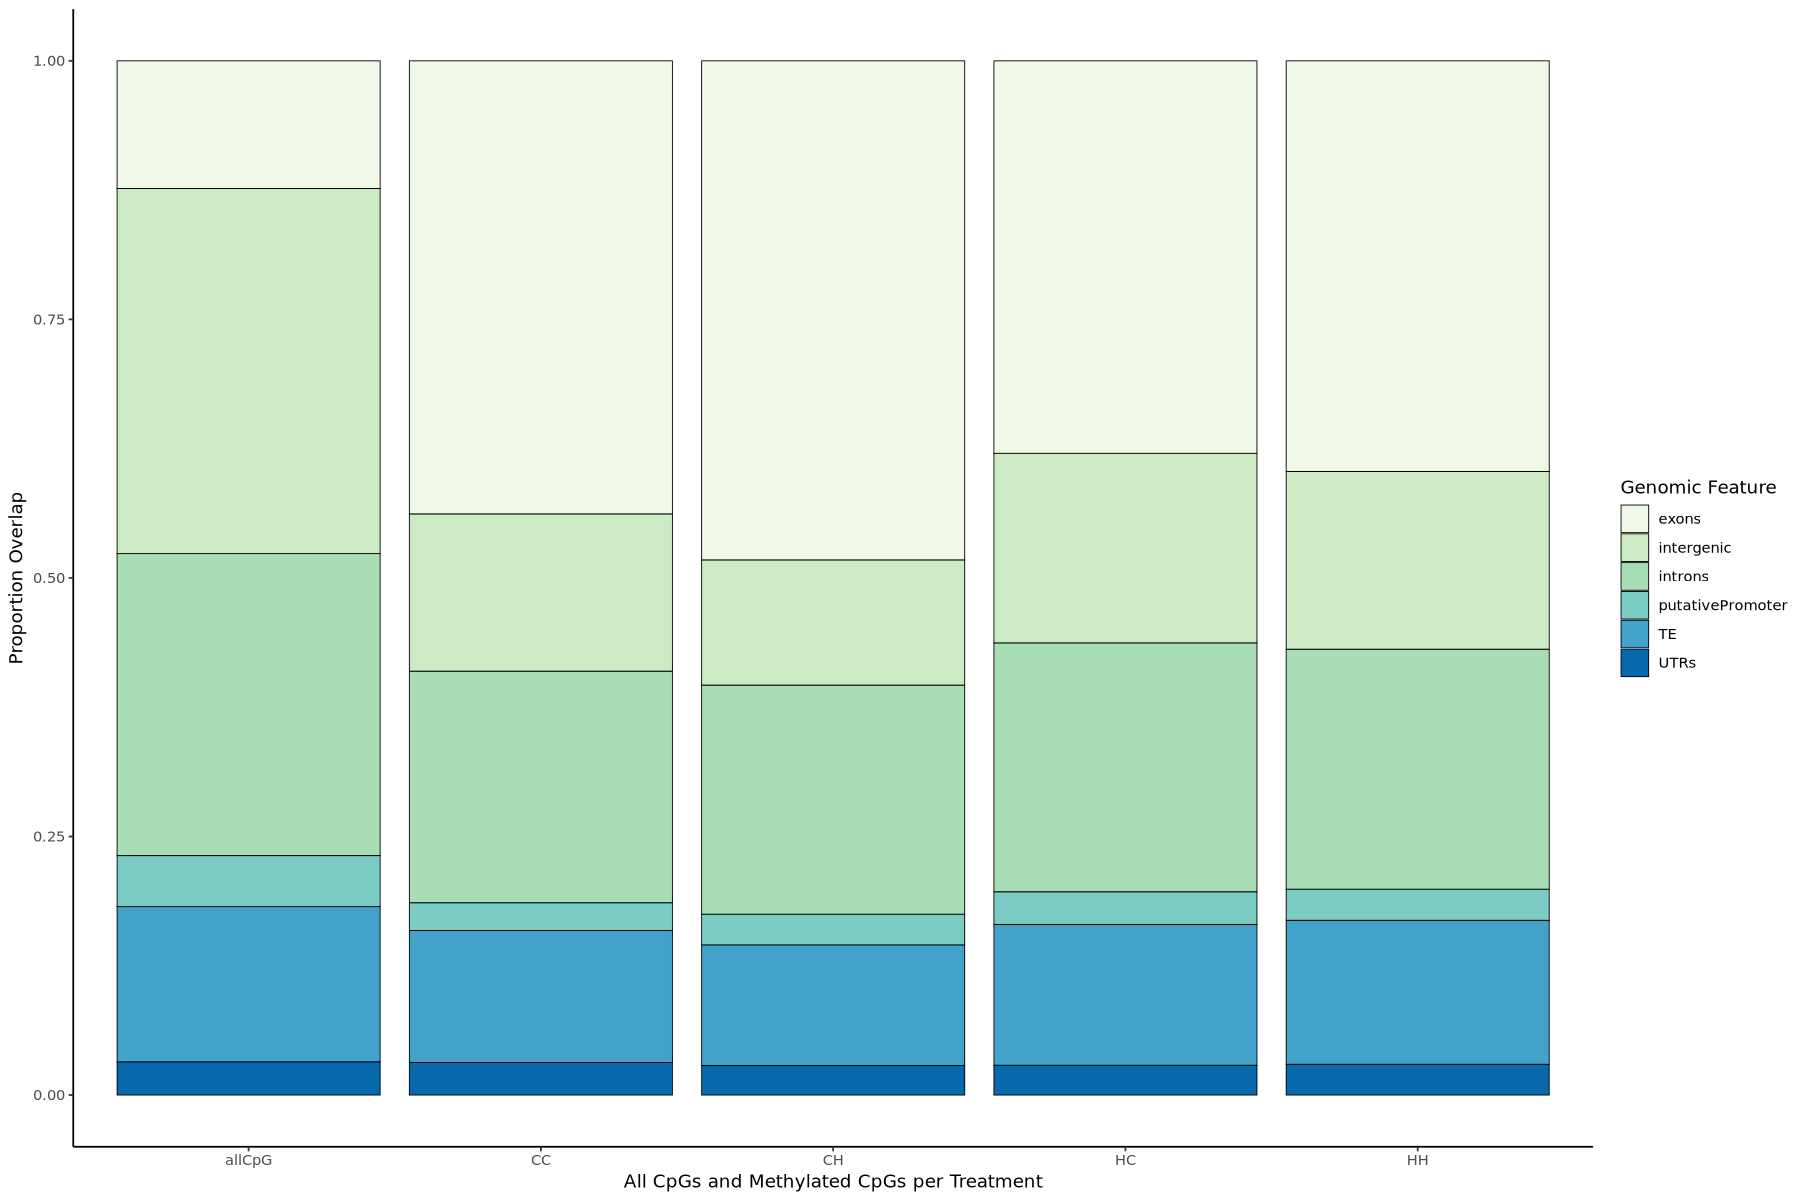

In [11]:
options(repr.plot.width=15, repr.plot.height=10)

propOv <- ggplot(df) +
 aes(x = treatment, y = proportion_overlap, fill = genomicFeature) +
 geom_col() +
 scale_fill_brewer(palette = "GnBu", 
 direction = 1) +
  geom_col(color = "black", size = 0.25) +
 labs(x = "All CpGs and Methylated CpGs per Treatment", y = "Proportion Overlap", 
 fill = "Genomic Feature") +
 theme_classic()

propOv

In [13]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/propOverlap.pdf', propOv, width=15, height=10)

So the allCpG column shows us the proportion of CpG dinucleotides that overlap with genomic features in the CV genome

CC, CH, HC, and HH show the proportiong of *methylated* CpG dinucleotides. We might expect that the distribution of methylated CpGs would be even across genomic features, and therefore reflect the allCpGs column. However, that is not what is being observed - meaning, some genomic features (exons, intergenic regions, promoters) are being disproportionately methylated from what is expected. 

We can then compare CH, HC, and HH to CC to observe differences of methylation distibution in response to varying hypoxic stress.


Even though a first exposure to hypoxia results in more methylation of exons compared to first exposure of control (see [figure](https://github.com/jgmcdonough/CE18_methylRAD_analysis/blob/master/analysis/figures/exonMe_barplot.pdf)), the proportiong of methylation in exons are less in HC and HH compared to CC and CH.